# Data Preperation

In [35]:
import os
import json
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [4]:
folder_path = '/kaggle/input/nlu-project1'
sampled_data = []
samples_per_file = 2000  

random_seed = 42

for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r', encoding='utf-8') as file:
            current_samples = [json.loads(line) for line in file]

        sampled_entries = random.sample(current_samples, min(samples_per_file, len(current_samples)))
        sampled_data.extend(sampled_entries)

sampled_df = pd.DataFrame(sampled_data)
sampled_df.to_csv('/kaggle/working/sampled_dataset.csv', index=False)

In [5]:
df=pd.read_csv('/kaggle/working/sampled_dataset.csv')
df

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5.0,2,False,"02 5, 2014",A2KWQ64TRHB3YH,B000Z601F8,Israel Drazin,These products consider the fact that mens ski...,These products made my skin look healthy,1391558400,NaN,NaN
1,5.0,10,True,"02 9, 2015",A2IDRAYYZ5GKBZ,B0012V3Y54,Catrinka,"For many years, I've wondered how my hair styl...",Is love too strong of an emotion for a blow-dr...,1423440000,NaN,NaN
2,5.0,3,False,"07 22, 2017",A2L6BT1PVV9YN0,B01C8278QQ,Robin,This is an awesome set of authentic replacemen...,No Duds In This Assortment Of Authentic Claris...,1500681600,{'Color:': ' Spring'},NaN
3,3.0,NaN,False,"11 8, 2013",A31VIMZP1Y6IUG,B001AO0WCG,amymn,I've been using this product for almost one ye...,"Good at First, then Not so Much",1383868800,NaN,NaN
4,5.0,NaN,True,"08 27, 2017",A3O7EIHOFHP6N3,B000KQ73QS,LauraG,"Great for straightening but kills volume, even...",Five Stars,1503792000,{'Size:': ' 3.5 oz'},NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
43995,4.0,NaN,True,"08 2, 2013",AO43A03C1LA0K,B000XBM180,Mr. Starks,I ordered 2 cans of this Terro since it has th...,Best Spider Killer!,1375401600,{'Size:': ' 19 Oz.'},NaN
43996,5.0,8,True,"07 14, 2016",A2PZHE3D4K5P29,B010NBJZLK,Dr.Zohier,Goooooood qualty and fun .\nI buy 2 Bounty it ...,Goooooood qualty and fun. I buy 2 Bounty it is...,1468454400,{'Style:': ' Bounty'},['https://images-na.ssl-images-amazon.com/imag...
43997,4.0,NaN,False,"02 5, 2015",A3Q4TYJVAM4IRM,B00PBWAK8Y,Omar Siddique,"Flexible, light-weight silicone gloves. The he...",thinner but more flexible than other silicone ...,1423094400,NaN,NaN
43998,5.0,2,True,"06 24, 2016",A13XPNE1VWB828,B016EQFD8W,FRANK NICK,"Just added 2 more of these panels, work just f...",work just fine with the other 5 panels I have,1466726400,{'Size:': ' 100w poly'},NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44000 entries, 0 to 43999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         44000 non-null  float64
 1   vote            8148 non-null   object 
 2   verified        44000 non-null  bool   
 3   reviewTime      44000 non-null  object 
 4   reviewerID      44000 non-null  object 
 5   asin            44000 non-null  object 
 6   reviewerName    43985 non-null  object 
 7   reviewText      43965 non-null  object 
 8   summary         43987 non-null  object 
 9   unixReviewTime  44000 non-null  int64  
 10  style           24211 non-null  object 
 11  image           1353 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 3.7+ MB


In [7]:
overall_counts = df['overall'].value_counts()
print(overall_counts)

overall
5.0    30708
4.0     6703
3.0     3363
1.0     1834
2.0     1392
Name: count, dtype: int64


In [5]:
folder_path = '/kaggle/input/nlu-project1'

sampled_data = []
samples_per_rating = 400  # No.of samples per rating in each file

random_seed = 42

for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r', encoding='utf-8') as file:
            current_samples = [json.loads(line) for line in file]

        ratings_count = {1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0}
        sampled_entries = []

        for entry in current_samples:
            rating = entry['overall']
            if ratings_count[rating] < samples_per_rating:
                sampled_entries.append(entry)
                ratings_count[rating] += 1

        sampled_data.extend(sampled_entries)

sampled_df = pd.DataFrame(sampled_data)
sampled_df.to_csv('/kaggle/working/sampled_dataset.csv', index=False)

In [29]:
df=pd.read_csv('/kaggle/working/sampled_dataset.csv')
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN
1,5.0,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN
2,5.0,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN
3,5.0,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN
4,5.0,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
39260,2.0,True,"08 5, 2015",A8TDT491G8XUU,B00004R9VV,{'Size:': ' 1-1/2-Acre Coverage'},jd,Kills lots of bugs but WILL NOT KILL MOSQUITOE...,All depends on what you want to zap,1438732800,NaN,NaN
39261,2.0,True,"08 4, 2015",A222Q6MHVJ43A9,B00004R9VV,{'Size:': ' 1/2-Acre Coverage'},karla kenyon,I just watched a fly circle this thing several...,Only Kills Suicidal Flies,1438646400,3,NaN
39262,2.0,True,"09 24, 2017",A1YP5D4Y0QUP8E,B00004RAGL,NaN,Nixxo55,should of just bought the whole hose it would...,Two Stars,1506211200,NaN,NaN
39263,2.0,True,"08 1, 2015",ALET6VMD5795M,B00004RALJ,NaN,Florence Patricia Thompson,I must say that I am disappointed with this pu...,It should be a bit larger to be acceptable!,1438387200,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39265 entries, 0 to 39264
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         39265 non-null  float64
 1   verified        39265 non-null  bool   
 2   reviewTime      39265 non-null  object 
 3   reviewerID      39265 non-null  object 
 4   asin            39265 non-null  object 
 5   style           21744 non-null  object 
 6   reviewerName    39260 non-null  object 
 7   reviewText      39257 non-null  object 
 8   summary         39254 non-null  object 
 9   unixReviewTime  39265 non-null  int64  
 10  vote            9734 non-null   object 
 11  image           776 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 3.3+ MB


In [31]:
overall_counts = df['overall'].value_counts()
print(overall_counts)

overall
5.0    8800
4.0    8283
3.0    7918
1.0    7165
2.0    7099
Name: count, dtype: int64


# Text preprocessing

In [33]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [32]:
columns_to_remove = ['reviewTime', 'reviewerID', 'style', 'reviewerName','unixReviewTime', 'vote', 'image']
df = df.drop(columns=columns_to_remove)

In [34]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
def preprocess_text(text):
    if pd.notna(text): 
        # 1. Lowercase
        text = text.lower()
        
        # 2. Remove special characters and digits
        text = re.sub(r'[^a-z\s]', '', text)
        
        # 3. Tokenization
        tokens = word_tokenize(text)
        
        # 4. Remove stopwords
        stop_words = set(stopwords.words('english'))
        important_words = ['not', 'very', 'extremely', 'highly', 'really', 'no', 'never',
                           'good', 'great', 'bad', 'poor', 'excellent', 'awful',
                           'truly', 'certainly', 'absolutely', 'but', 'however', 'although',
                           'better', 'worse', 'more', 'less', 'now', 'today', 'currently',
                           'many', 'few', 'several']
        stop_words.difference_update(important_words) # remove stopwords other than some mention imp words
        
        tokens = [token for token in tokens if token not in stop_words]
        
        # 5. Stemming 
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]
        
        processed_text = ' '.join(tokens)
        
        return processed_text
    else:
        return ''

In [36]:
df['processed_reviewText'] = df['reviewText'].apply(preprocess_text)
df['processed_summary'] = df['summary'].apply(preprocess_text)

In [37]:
df.to_csv('/kaggle/working/df_processed.csv', index=False)

In [36]:
df=pd.read_csv('/kaggle/input/sampled-nlu1/df_processed (1).csv')

In [37]:
df

,overall,verified,asin,reviewText,summary,processed_reviewText,processed_summary
0,5.0,True,B00004U9V2,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,handcream beauti fragranc doesnt stay protect ...,beauti fragranc
1,5.0,True,B00004U9V2,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,wonder hand lotion serious dri skin stay long ...,wonder hand lotion
2,5.0,True,B00004U9V2,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,best hand cream around silki thick soak way le...,best hand cream around
3,5.0,True,B00004U9V2,Thanks!!,Five Stars,thank,five star
4,5.0,True,B00004U9V2,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,great hand lotion soak right leav skin super s...,great hand lotion
...,...,...,...,...,...,...,...
39260,2.0,True,B00004R9VV,Kills lots of bugs but WILL NOT KILL MOSQUITOE...,All depends on what you want to zap,kill lot bug but not kill mosquito not fool al...,depend want zap
39261,2.0,True,B00004R9VV,I just watched a fly circle this thing several...,Only Kills Suicidal Flies,watch fli circl thing sever time fli unharm on...,kill suicid fli
39262,2.0,True,B00004RAGL,should of just bought the whole hose it would...,Two Stars,bought whole hose would cheaper,two star
39263,2.0,True,B00004RALJ,I must say that I am disappointed with this pu...,It should be a bit larger to be acceptable!,must say disappoint purchas veri small even on...,bit larger accept


# TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [39]:
corpus = df['processed_reviewText'].tolist()

In [40]:
df['processed_reviewText'].fillna('', inplace=True)
df['processed_summary'].fillna('', inplace=True)

/tmp/ipykernel_33/2412774931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['processed_reviewText'].fillna('', inplace=True)
/tmp/ipykernel_33/2412774931.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [41]:
unique_ratings = df['overall'].unique()

for rating in unique_ratings:
    subset_df = df[df['overall'] == rating]
    corpus = subset_df['processed_reviewText'].tolist()

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

    feature_names = tfidf_vectorizer.get_feature_names_out()
    total_tfidf_scores = tfidf_matrix.sum(axis=0)
    tfidf_scores_df = pd.DataFrame({'Term': feature_names, 'TF-IDF Score': total_tfidf_scores.tolist()[0]})

    tfidf_scores_df = tfidf_scores_df.sort_values(by='TF-IDF Score', ascending=False)
    top_terms = tfidf_scores_df.head(10)['Term'].tolist()
    print(f"\nTop 10 terms for rating {rating}:\n", top_terms)


Top 10 terms for rating 5.0:
 ['great', 'love', 'good', 'work', 'veri', 'product', 'use', 'one', 'like', 'but']

Top 10 terms for rating 4.0:
 ['good', 'but', 'great', 'work', 'use', 'like', 'not', 'veri', 'game', 'one']

Top 10 terms for rating 3.0:
 ['but', 'not', 'ok', 'good', 'work', 'use', 'like', 'game', 'one', 'veri']

Top 10 terms for rating 1.0:
 ['not', 'but', 'work', 'use', 'one', 'like', 'veri', 'product', 'game', 'get']

Top 10 terms for rating 2.0:
 ['not', 'but', 'use', 'like', 'veri', 'one', 'work', 'game', 'get', 'good']


In [42]:
unique_ratings = df['overall'].unique()

for rating in unique_ratings:
    subset_df = df[df['overall'] == rating]
    corpus = subset_df['processed_summary'].tolist()

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    total_tfidf_scores = tfidf_matrix.sum(axis=0)
    tfidf_scores_df = pd.DataFrame({'Term': feature_names, 'TF-IDF Score': total_tfidf_scores.tolist()[0]})

    tfidf_scores_df = tfidf_scores_df.sort_values(by='TF-IDF Score', ascending=False)
    top_terms = tfidf_scores_df.head(10)['Term'].tolist()
    print(f"\nTop 10 terms for rating {rating}:\n", top_terms)


Top 10 terms for rating 5.0:
 ['five', 'star', 'great', 'love', 'good', 'work', 'product', 'excel', 'perfect', 'best']

Top 10 terms for rating 4.0:
 ['star', 'four', 'good', 'great', 'work', 'use', 'but', 'nice', 'not', 'veri']

Top 10 terms for rating 3.0:
 ['star', 'three', 'good', 'not', 'but', 'need', 'ok', 'great', 'work', 'kit']

Top 10 terms for rating 1.0:
 ['star', 'one', 'not', 'dont', 'disappoint', 'work', 'buy', 'money', 'wast', 'good']

Top 10 terms for rating 2.0:
 ['star', 'two', 'not', 'good', 'disappoint', 'but', 'work', 'great', 'like', 'veri']


In [43]:
unique_ratings = df['overall'].unique()

for rating in unique_ratings:
    subset_df = df[df['overall'] == rating]
    corpus = subset_df['processed_reviewText'].tolist()

    tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2))

    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    total_tfidf_scores = tfidf_matrix.sum(axis=0)

    tfidf_scores_df = pd.DataFrame({'Bigram': feature_names, 'TF-IDF Score': total_tfidf_scores.tolist()[0]})
    tfidf_scores_df = tfidf_scores_df.sort_values(by='TF-IDF Score', ascending=False)

    top_bigrams = tfidf_scores_df.head(10)['Bigram'].tolist()
    print(f"\nTop 10 bigrams for rating {rating}:\n", top_bigrams)


Top 10 bigrams for rating 5.0:
 ['work great', 'great product', 'veri good', 'good product', 'gift card', 'great price', 'work well', 'great gift', 'veri nice', 'excel product']

Top 10 bigrams for rating 4.0:
 ['work great', 'work well', 'veri good', 'good product', 'leaf blower', 'pull rod', 'rod brush', 'but not', 'drill attach', 'rod get']

Top 10 bigrams for rating 3.0:
 ['dryer vent', 'but not', 'lint catcher', 'clean lint', 'lose rod', 'brush broke', 'climb attic', 'make sure', 'put togeth', 'bit more']

Top 10 bigrams for rating 1.0:
 ['not work', 'wast money', 'would not', 'veri disappoint', 'not buy', 'not recommend', 'not worth', 'didnt work', 'not good', 'but not']

Top 10 bigrams for rating 2.0:
 ['but not', 'not good', 'would not', 'not veri', 'not work', 'work well', 'dont like', 'not like', 'not worth', 'not buy']


In [44]:
unique_ratings = df['overall'].unique()

for rating in unique_ratings:
    subset_df = df[df['overall'] == rating]
    corpus = subset_df['processed_summary'].tolist()

    tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2))
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

    feature_names = tfidf_vectorizer.get_feature_names_out()
    total_tfidf_scores = tfidf_matrix.sum(axis=0)
    tfidf_scores_df = pd.DataFrame({'Bigram': feature_names, 'TF-IDF Score': total_tfidf_scores.tolist()[0]})

    tfidf_scores_df = tfidf_scores_df.sort_values(by='TF-IDF Score', ascending=False)
    top_bigrams = tfidf_scores_df.head(10)['Bigram'].tolist()
    print(f"\nTop 10 bigrams for rating {rating}:\n", top_bigrams)


Top 10 bigrams for rating 5.0:
 ['five star', 'great product', 'work great', 'work well', 'eat lint', 'excel product', 'work like', 'like charm', 'good product', 'veri good']

Top 10 bigrams for rating 4.0:
 ['four star', 'work great', 'great use', 'use common', 'common sens', 'good product', 'work well', 'pretti good', 'veri good', 'good valu']

Top 10 bigrams for rating 3.0:
 ['three star', 'good kit', 'kit caveat', 'but not', 'good but', 'not great', 'not bad', 'ok but', 'could better', 'not expect']

Top 10 bigrams for rating 1.0:
 ['one star', 'wast money', 'dont buy', 'dont wast', 'not work', 'not buy', 'poor qualiti', 'not good', 'veri disappoint', 'not worth']

Top 10 bigrams for rating 2.0:
 ['two star', 'not good', 'not great', 'not expect', 'not worth', 'didnt work', 'poor qualiti', 'not impress', 'not work', 'but not']


In [45]:
unique_ratings = df['overall'].unique()

for rating in unique_ratings:
    subset_df = df[df['overall'] == rating]
    corpus = subset_df['processed_reviewText'].tolist()

    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    total_tfidf_scores = tfidf_matrix.sum(axis=0)
    tfidf_scores_df = pd.DataFrame({'Term': feature_names, 'TF-IDF Score': total_tfidf_scores.tolist()[0]})

    tfidf_scores_df = tfidf_scores_df.sort_values(by='TF-IDF Score', ascending=False)

    top_terms = tfidf_scores_df.head(10)['Term'].tolist()
    print(f"\nTop 10 terms (unigrams and bigrams) for rating {rating}:\n", top_terms)


Top 10 terms (unigrams and bigrams) for rating 5.0:
 ['great', 'love', 'good', 'work', 'veri', 'product', 'use', 'excel', 'one', 'gift']

Top 10 terms (unigrams and bigrams) for rating 4.0:
 ['good', 'great', 'but', 'work', 'use', 'like', 'not', 'rod', 'veri', 'one']

Top 10 terms (unigrams and bigrams) for rating 3.0:
 ['ok', 'but', 'not', 'good', 'work', 'use', 'like', 'game', 'veri', 'one']

Top 10 terms (unigrams and bigrams) for rating 1.0:
 ['not', 'but', 'use', 'work', 'one', 'like', 'veri', 'product', 'game', 'get']

Top 10 terms (unigrams and bigrams) for rating 2.0:
 ['not', 'but', 'like', 'use', 'one', 'veri', 'work', 'game', 'get', 'good']


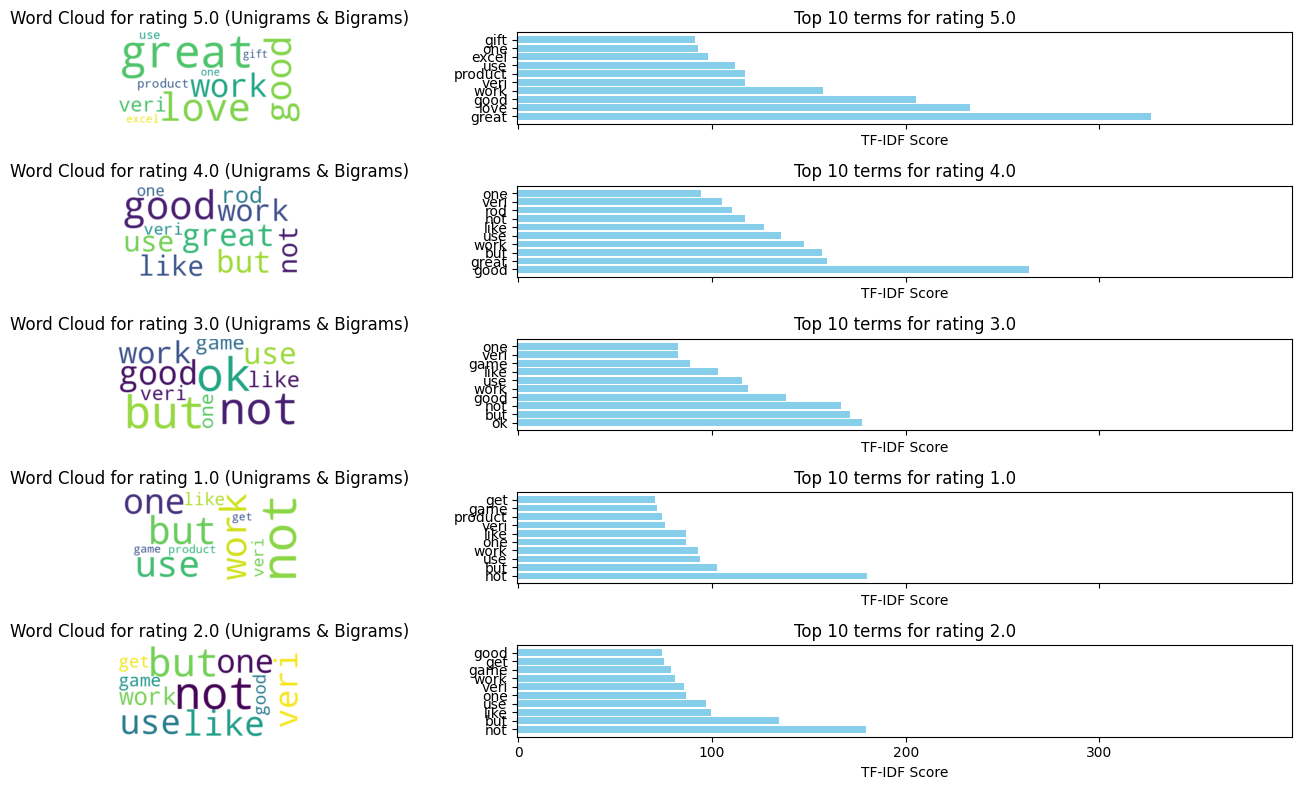

In [46]:
unique_ratings = df['overall'].unique()

fig, axes = plt.subplots(nrows=len(unique_ratings), ncols=2, figsize=(15, 8), sharex=True)

for i, rating in enumerate(unique_ratings):
    subset_df = df[df['overall'] == rating]
    corpus = subset_df['processed_reviewText'].tolist()

    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    total_tfidf_scores = tfidf_matrix.sum(axis=0)
    tfidf_scores_df = pd.DataFrame({'Term': feature_names, 'TF-IDF Score': total_tfidf_scores.tolist()[0]})
    tfidf_scores_df = tfidf_scores_df.sort_values(by='TF-IDF Score', ascending=False)

    top_terms = tfidf_scores_df.head(10)['Term'].tolist()

    wordcloud = WordCloud(width=400, height=200, max_words=50, background_color='white').generate_from_frequencies(dict(zip(top_terms, tfidf_scores_df.head(10)['TF-IDF Score'].tolist())))
    axes[i, 0].imshow(wordcloud, interpolation='bilinear')
    axes[i, 0].set_title(f"Word Cloud for rating {rating} (Unigrams & Bigrams)")
    axes[i, 0].axis("off")

    axes[i, 1].barh(tfidf_scores_df.head(10)['Term'], tfidf_scores_df.head(10)['TF-IDF Score'], color='skyblue')
    axes[i, 1].set_title(f"Top 10 terms for rating {rating}")
    axes[i, 1].set_xlabel("TF-IDF Score")

plt.tight_layout()
plt.show()

In [47]:
unique_ratings = df['overall'].unique()

for rating in unique_ratings:
    subset_df = df[df['overall'] == rating]
    corpus = subset_df['processed_summary'].tolist()
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    total_tfidf_scores = tfidf_matrix.sum(axis=0)
    
    tfidf_scores_df = pd.DataFrame({'Term': feature_names, 'TF-IDF Score': total_tfidf_scores.tolist()[0]})
    tfidf_scores_df = tfidf_scores_df.sort_values(by='TF-IDF Score', ascending=False)
    top_terms = tfidf_scores_df.head(10)['Term'].tolist()
    print(f"\nTop 10 terms (unigrams and bigrams) for rating {rating}:\n", top_terms)


Top 10 terms (unigrams and bigrams) for rating 5.0:
 ['five star', 'five', 'star', 'great', 'love', 'good', 'work', 'product', 'excel', 'perfect']

Top 10 terms (unigrams and bigrams) for rating 4.0:
 ['four star', 'four', 'star', 'good', 'great', 'work', 'use', 'but', 'work great', 'nice']

Top 10 terms (unigrams and bigrams) for rating 3.0:
 ['star', 'three star', 'three', 'need', 'good', 'not', 'ok', 'but', 'okay', 'kit']

Top 10 terms (unigrams and bigrams) for rating 1.0:
 ['star', 'one star', 'one', 'not', 'disappoint', 'dont', 'wast', 'money', 'work', 'buy']

Top 10 terms (unigrams and bigrams) for rating 2.0:
 ['star', 'two star', 'two', 'not', 'disappoint', 'good', 'but', 'work', 'ok', 'great']


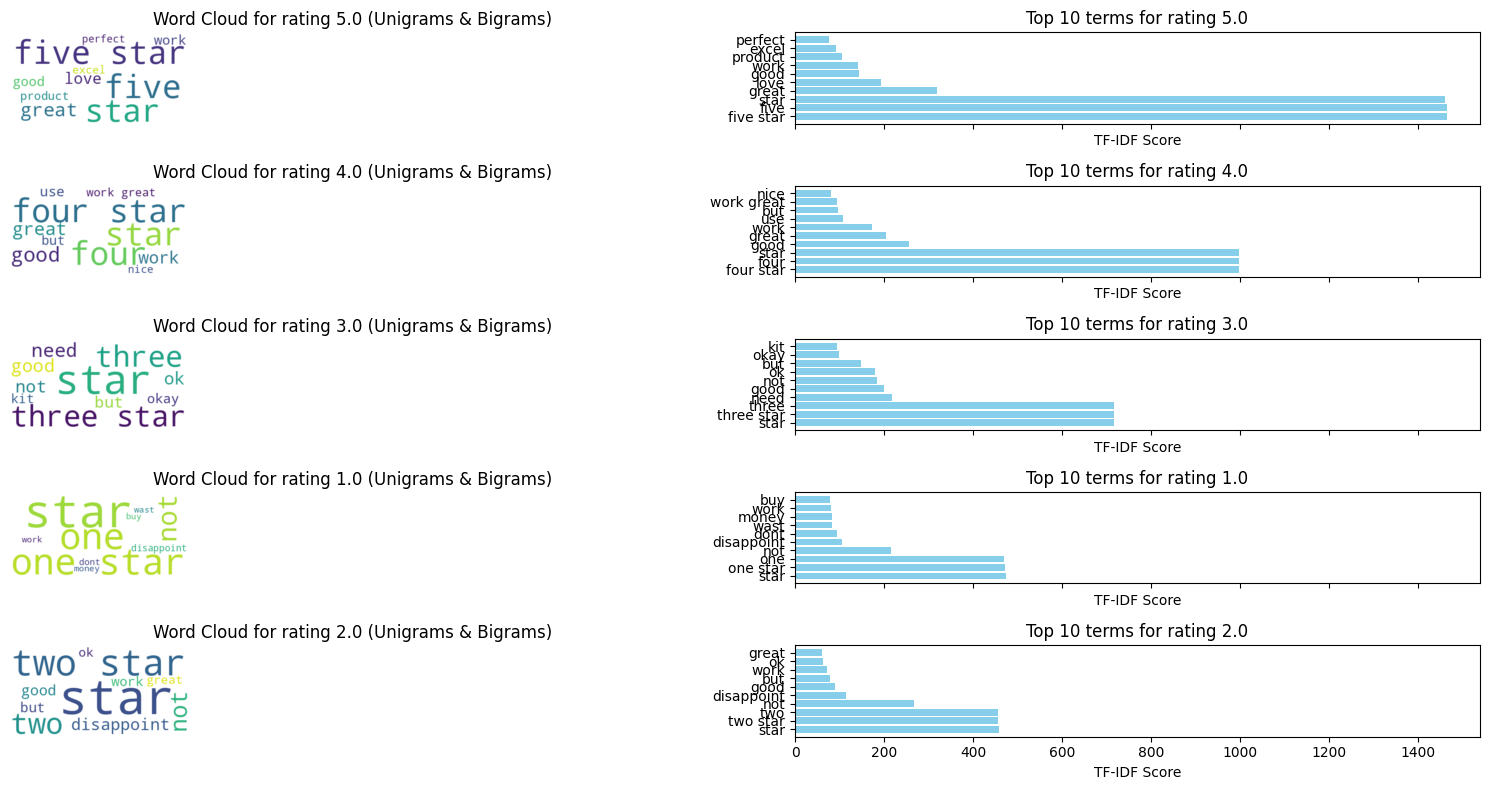

In [48]:
unique_ratings = df['overall'].unique()

fig, axes = plt.subplots(nrows=len(unique_ratings), ncols=2, figsize=(15, 8), sharex=True)

for i, rating in enumerate(unique_ratings):
    subset_df = df[df['overall'] == rating]
    corpus = subset_df['processed_summary'].tolist()
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

    feature_names = tfidf_vectorizer.get_feature_names_out()
    total_tfidf_scores = tfidf_matrix.sum(axis=0)
    tfidf_scores_df = pd.DataFrame({'Term': feature_names, 'TF-IDF Score': total_tfidf_scores.tolist()[0]})

    tfidf_scores_df = tfidf_scores_df.sort_values(by='TF-IDF Score', ascending=False)
    top_terms = tfidf_scores_df.head(10)['Term'].tolist()

    wordcloud = WordCloud(width=400, height=200, max_words=50, background_color='white').generate_from_frequencies(dict(zip(top_terms, tfidf_scores_df.head(10)['TF-IDF Score'].tolist())))

    axes[i, 0].imshow(wordcloud, interpolation='bilinear')
    axes[i, 0].set_title(f"Word Cloud for rating {rating} (Unigrams & Bigrams)")
    axes[i, 0].axis("off")

    axes[i, 1].barh(tfidf_scores_df.head(10)['Term'], tfidf_scores_df.head(10)['TF-IDF Score'], color='skyblue')
    axes[i, 1].set_title(f"Top 10 terms for rating {rating}")
    axes[i, 1].set_xlabel("TF-IDF Score")

plt.tight_layout()
plt.show()

In [49]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

print(f"Train set size: {len(df_train)} samples")
print(f"Validation set size: {len(df_val)} samples")

Train set size: 31412 samples
Validation set size: 7853 samples


# 5- class classification

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
from scipy.sparse import hstack
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Naive Bayes classifier.

bow + reviewText

In [51]:
vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(df_train['processed_reviewText'])
X_val_bow = vectorizer.transform(df_val['processed_reviewText'])

gnb = GaussianNB()
gnb.fit(X_train_bow.toarray(), df_train['overall'])

y_pred_gaussian_1 = gnb.predict(X_val_bow.toarray())
accuracy_gaussian_1 = metrics.accuracy_score(df_val['overall'], y_pred_gaussian_1)

mnb = MultinomialNB()
mnb.fit(X_train_bow, df_train['overall'])

y_pred_multinomial_1 = mnb.predict(X_val_bow)
accuracy_multinomial_1 = accuracy_score(df_val['overall'], y_pred_multinomial_1)

print("Gaussian Naive Bayes Accuracy on Validation Set:", accuracy_gaussian_1)
print("Multinomial Naive Bayes Accuracy on Validation Set:", accuracy_multinomial_1)

Gaussian Naive Bayes Accuracy on Validation Set: 0.34903858398064436
Multinomial Naive Bayes Accuracy on Validation Set: 0.48274544759964344


In [52]:
print("Gaussian Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(df_val['overall'], y_pred_gaussian_1))
print("Precision:", precision_score(df_val['overall'], y_pred_gaussian_1, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_gaussian_1, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_gaussian_1, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_gaussian_1))

print("\nMultinomial Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(df_val['overall'], y_pred_multinomial_1))
print("Precision:", precision_score(df_val['overall'], y_pred_multinomial_1, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_multinomial_1, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_multinomial_1, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_multinomial_1))

Gaussian Naive Bayes Metrics:
Accuracy: 0.34903858398064436
Precision: 0.37858027885002593
Recall: 0.34903858398064436
F1 Score: 0.309660579322906
Confusion Matrix:
 [[ 456  124   77   66  653]
 [ 314  262  128   82  656]
 [ 229  127  250  132  847]
 [ 164  106  113  284  976]
 [ 107   47   57  107 1489]]

Multinomial Naive Bayes Metrics:
Accuracy: 0.48274544759964344
Precision: 0.4821208256708012
Recall: 0.48274544759964344
F1 Score: 0.4810703493924365
Confusion Matrix:
 [[ 799  317  126   74   60]
 [ 379  593  263  142   65]
 [ 218  388  601  259  119]
 [ 119  187  315  635  387]
 [ 107   81  139  317 1163]]


bow + summary

In [53]:
vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(df_train['processed_summary'])
X_val_bow = vectorizer.transform(df_val['processed_summary'])

gnb = GaussianNB()
gnb.fit(X_train_bow.toarray(), df_train['overall'])

y_pred_gaussian_2 = gnb.predict(X_val_bow.toarray())
accuracy_gaussian_2 = metrics.accuracy_score(df_val['overall'], y_pred_gaussian_2)

mnb = MultinomialNB()
mnb.fit(X_train_bow, df_train['overall'])

y_pred_multinomial_2 = mnb.predict(X_val_bow)
accuracy_multinomial_2 = accuracy_score(df_val['overall'], y_pred_multinomial_2)

print("Gaussian Naive Bayes Accuracy on Validation Set:", accuracy_gaussian_2)
print("Multinomial Naive Bayes Accuracy on Validation Set:", accuracy_multinomial_2)

Gaussian Naive Bayes Accuracy on Validation Set: 0.3385967146313511
Multinomial Naive Bayes Accuracy on Validation Set: 0.5701005984973896


In [54]:
print("Gaussian Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(df_val['overall'], y_pred_gaussian_2))
print("Precision:", precision_score(df_val['overall'], y_pred_gaussian_2, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_gaussian_2, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_gaussian_2, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_gaussian_2))

print("\nMultinomial Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(df_val['overall'], y_pred_multinomial_2))
print("Precision:", precision_score(df_val['overall'], y_pred_multinomial_2, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_multinomial_2, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_multinomial_2, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_multinomial_2))

Gaussian Naive Bayes Metrics:
Accuracy: 0.3385967146313511
Precision: 0.3952246866065187
Recall: 0.3385967146313511
F1 Score: 0.2827867533951685
Confusion Matrix:
 [[ 443   55   62   61  755]
 [ 245  158  116  101  822]
 [ 137   70  205  128 1045]
 [  65   46   72  211 1249]
 [  33   33   39   60 1642]]

Multinomial Naive Bayes Metrics:
Accuracy: 0.5701005984973896
Precision: 0.5674098804341788
Recall: 0.5701005984973896
F1 Score: 0.5682187191967467
Confusion Matrix:
 [[ 840  258  139   69   70]
 [ 333  618  283  121   87]
 [ 151  241  824  226  143]
 [  78   99  239  923  304]
 [  83   56  104  292 1272]]


tfidf + review + summary

In [55]:
vectorizer_review = TfidfVectorizer()
vectorizer_summary = TfidfVectorizer()

X_train_tfidf_review = vectorizer_review.fit_transform(df_train['processed_reviewText'])
X_val_tfidf_review = vectorizer_review.transform(df_val['processed_reviewText'])

X_train_tfidf_summary = vectorizer_summary.fit_transform(df_train['processed_summary'])
X_val_tfidf_summary = vectorizer_summary.transform(df_val['processed_summary'])

X_train_tfidf_combined = hstack([X_train_tfidf_review, X_train_tfidf_summary])
X_val_tfidf_combined = hstack([X_val_tfidf_review, X_val_tfidf_summary])

gnb = GaussianNB()
gnb.fit(X_train_tfidf_combined.toarray(), df_train['overall'])

y_pred_gaussian_3 = gnb.predict(X_val_tfidf_combined.toarray())
accuracy_gaussian_3 = accuracy_score(df_val['overall'], y_pred_gaussian_3)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf_combined, df_train['overall'])

y_pred_multinomial_3 = mnb.predict(X_val_tfidf_combined)
accuracy_multinomial_3 = accuracy_score(df_val['overall'], y_pred_multinomial_3)

print("Gaussian Naive Bayes Accuracy with TF-IDF on Validation Set:", accuracy_gaussian_3)
print("Multinomial Naive Bayes Accuracy with TF-IDF on Validation Set:", accuracy_multinomial_3)


Gaussian Naive Bayes Accuracy with TF-IDF on Validation Set: 0.4269705844900038
Multinomial Naive Bayes Accuracy with TF-IDF on Validation Set: 0.6372087100471158


In [56]:
print("Gaussian Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(df_val['overall'], y_pred_gaussian_3))
print("Precision:", precision_score(df_val['overall'], y_pred_gaussian_3, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_gaussian_3, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_gaussian_3, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_gaussian_3))

print("\nMultinomial Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(df_val['overall'], y_pred_multinomial_3))
print("Precision:", precision_score(df_val['overall'], y_pred_multinomial_3, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_multinomial_3, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_multinomial_3, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_multinomial_3))

Gaussian Naive Bayes Metrics:
Accuracy: 0.4269705844900038
Precision: 0.42881786840218467
Recall: 0.4269705844900038
F1 Score: 0.4090059743321067
Confusion Matrix:
 [[ 589  171  118  107  391]
 [ 374  364  188  136  380]
 [ 267  182  377  187  572]
 [ 170  125  170  677  501]
 [ 115   81   98  167 1346]]

Multinomial Naive Bayes Metrics:
Accuracy: 0.6372087100471158
Precision: 0.6405113470715196
Recall: 0.6372087100471158
F1 Score: 0.636886721436629
Confusion Matrix:
 [[ 938  212  138   65   23]
 [ 285  676  319  124   38]
 [ 116  200  940  270   59]
 [  45   64  219 1108  207]
 [  36   32   83  314 1342]]


## Decision Tree

bow + reviewText

In [57]:
vectorizer_review = CountVectorizer()

X_train_bow_review = vectorizer_review.fit_transform(df_train['processed_reviewText'])
X_val_bow_review = vectorizer_review.transform(df_val['processed_reviewText'])

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_bow_review, df_train['overall'])

y_pred_entropy_1 = dt_entropy.predict(X_val_bow_review)
accuracy_entropy_1 = metrics.accuracy_score(df_val['overall'], y_pred_entropy_1)

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train_bow_review, df_train['overall'])

y_pred_gini_1 = dt_gini.predict(X_val_bow_review)
accuracy_gini_1 = metrics.accuracy_score(df_val['overall'], y_pred_gini_1)

print("Decision Tree Accuracy with Entropy on Validation Set:", accuracy_entropy_1)
print("Decision Tree Accuracy with Gini on Validation Set:", accuracy_gini_1)

Decision Tree Accuracy with Entropy on Validation Set: 0.44097797020247037
Decision Tree Accuracy with Gini on Validation Set: 0.44670826435757033


In [58]:
print("\nDecision Tree Metrics (Entropy):")
print("Accuracy:", accuracy_entropy_1)
print("Precision:", precision_score(df_val['overall'], y_pred_entropy_1, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_entropy_1, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_entropy_1, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_entropy_1))

print("\nDecision Tree Metrics (Gini):")
print("Accuracy:", accuracy_gini_1)
print("Precision:", precision_score(df_val['overall'], y_pred_gini_1, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_gini_1, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_gini_1, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_gini_1))


Decision Tree Metrics (Entropy):
Accuracy: 0.44097797020247037
Precision: 0.4403514044424662
Recall: 0.44097797020247037
F1 Score: 0.4406458546443927
Confusion Matrix:
 [[ 653  303  191  127  102]
 [ 309  518  278  183  154]
 [ 210  276  633  275  191]
 [ 128  194  292  653  376]
 [  96  139  194  372 1006]]

Decision Tree Metrics (Gini):
Accuracy: 0.44670826435757033
Precision: 0.44609256258779273
Recall: 0.44670826435757033
F1 Score: 0.44637122558553
Confusion Matrix:
 [[ 671  299  171  132  103]
 [ 292  519  305  186  140]
 [ 215  292  634  257  187]
 [ 145  185  285  663  365]
 [  96  132  180  378 1021]]


bow + summary

In [59]:
vectorizer_summary = CountVectorizer()

X_train_bow_summary = vectorizer_summary.fit_transform(df_train['processed_summary'])
X_val_bow_summary = vectorizer_summary.transform(df_val['processed_summary'])

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_bow_summary, df_train['overall'])

y_pred_entropy_2 = dt_entropy.predict(X_val_bow_summary)
accuracy_entropy_2 = metrics.accuracy_score(df_val['overall'], y_pred_entropy_2)

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train_bow_summary, df_train['overall'])

y_pred_gini_2 = dt_gini.predict(X_val_bow_summary)
accuracy_gini_2 = metrics.accuracy_score(df_val['overall'], y_pred_gini_2)

print("Decision Tree Accuracy with Entropy on Validation Set:", accuracy_entropy_2)
print("Decision Tree Accuracy with Gini on Validation Set:", accuracy_gini_2)

Decision Tree Accuracy with Entropy on Validation Set: 0.5618235069400229
Decision Tree Accuracy with Gini on Validation Set: 0.5616961670699095


In [60]:
print("\nDecision Tree Metrics (Entropy):")
print("Accuracy:", accuracy_entropy_2)
print("Precision:", precision_score(df_val['overall'], y_pred_entropy_2, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_entropy_2, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_entropy_2, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_entropy_2))

print("\nDecision Tree Metrics (Gini):")
print("Accuracy:", accuracy_gini_2)
print("Precision:", precision_score(df_val['overall'], y_pred_gini_2, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_gini_2, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_gini_2, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_gini_2))


Decision Tree Metrics (Entropy):
Accuracy: 0.5618235069400229
Precision: 0.5633456203395305
Recall: 0.5618235069400229
F1 Score: 0.5597705118049918
Confusion Matrix:
 [[ 912  215  118   64   67]
 [ 412  653  203  104   70]
 [ 245  251  745  205  139]
 [ 136   83  228  875  321]
 [ 114   63  121  282 1227]]

Decision Tree Metrics (Gini):
Accuracy: 0.5616961670699095
Precision: 0.5628390495757092
Recall: 0.5616961670699095
F1 Score: 0.559772481366882
Confusion Matrix:
 [[ 917  230  102   56   71]
 [ 398  668  219   95   62]
 [ 239  252  749  212  133]
 [ 132   87  244  856  324]
 [ 110   67  118  291 1221]]


tfidf + review + summary

In [61]:
df_train['processed_reviewText'].fillna('', inplace=True)
df_train['processed_summary'].fillna('', inplace=True)

df_val['processed_reviewText'].fillna('', inplace=True)
df_val['processed_summary'].fillna('', inplace=True)

vectorizer_review = TfidfVectorizer()
vectorizer_summary = TfidfVectorizer()

X_train_tfidf_review = vectorizer_review.fit_transform(df_train['processed_reviewText'])
X_train_tfidf_summary = vectorizer_summary.fit_transform(df_train['processed_summary'])

X_val_tfidf_review = vectorizer_review.transform(df_val['processed_reviewText'])
X_val_tfidf_summary = vectorizer_summary.transform(df_val['processed_summary'])

X_train_tfidf_combined = hstack([X_train_tfidf_review, X_train_tfidf_summary])
X_val_tfidf_combined = hstack([X_val_tfidf_review, X_val_tfidf_summary])

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_tfidf_combined, df_train['overall'])

y_pred_entropy_3 = dt_entropy.predict(X_val_tfidf_combined)
accuracy_entropy_3 = metrics.accuracy_score(df_val['overall'], y_pred_entropy_3)

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train_tfidf_combined, df_train['overall'])

y_pred_gini_3 = dt_gini.predict(X_val_tfidf_combined)
accuracy_gini_3 = metrics.accuracy_score(df_val['overall'], y_pred_gini_3)

print("Decision Tree Accuracy with Entropy on Validation Set:", accuracy_entropy_3)
print("Decision Tree Accuracy with Gini on Validation Set:", accuracy_gini_3)

/tmp/ipykernel_33/1877800179.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['processed_reviewText'].fillna('', inplace=True)
/tmp/ipykernel_33/1877800179.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

Decision Tree Accuracy with Entropy on Validation Set: 0.5364828727874698
Decision Tree Accuracy with Gini on Validation Set: 0.5467974022666496


In [62]:
print("\nDecision Tree Metrics (Entropy):")
print("Accuracy:", accuracy_entropy_3)
print("Precision:", precision_score(df_val['overall'], y_pred_entropy_3, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_entropy_3, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_entropy_3, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_entropy_3))

print("\nDecision Tree Metrics (Gini):")
print("Accuracy:", accuracy_gini_3)
print("Precision:", precision_score(df_val['overall'], y_pred_gini_3, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_gini_3, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_gini_3, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_gini_3))


Decision Tree Metrics (Entropy):
Accuracy: 0.5364828727874698
Precision: 0.5365920663682625
Recall: 0.5364828727874698
F1 Score: 0.5364787122771196
Confusion Matrix:
 [[ 723  321  145   85  102]
 [ 292  658  241  145  106]
 [ 167  240  803  235  140]
 [ 117  139  263  840  284]
 [ 101  110  133  274 1189]]

Decision Tree Metrics (Gini):
Accuracy: 0.5467974022666496
Precision: 0.5466938722905498
Recall: 0.5467974022666496
F1 Score: 0.54666879418713
Confusion Matrix:
 [[ 776  267  159   89   85]
 [ 292  658  255  140   97]
 [ 168  238  816  238  125]
 [ 116  148  252  835  292]
 [  68  123  131  276 1209]]


## Random Forest

bow + review

In [63]:
vectorizer_review = CountVectorizer()

X_train_bow_review = vectorizer_review.fit_transform(df_train['processed_reviewText'])
X_val_bow_review = vectorizer_review.transform(df_val['processed_reviewText'])

rf_20_trees = RandomForestClassifier(n_estimators=20, random_state=42)
rf_20_trees.fit(X_train_bow_review, df_train['overall'])

y_pred_20_trees_1 = rf_20_trees.predict(X_val_bow_review)
accuracy_20_trees_1 = metrics.accuracy_score(df_val['overall'], y_pred_20_trees_1)

rf_50_trees = RandomForestClassifier(n_estimators=50, random_state=42)
rf_50_trees.fit(X_train_bow_review, df_train['overall'])

y_pred_50_trees_1 = rf_50_trees.predict(X_val_bow_review)
accuracy_50_trees_1 = metrics.accuracy_score(df_val['overall'], y_pred_50_trees_1)

rf_100_trees = RandomForestClassifier(n_estimators=100, random_state=42)
rf_100_trees.fit(X_train_bow_review, df_train['overall'])

y_pred_100_trees_1 = rf_100_trees.predict(X_val_bow_review)
accuracy_100_trees_1 = metrics.accuracy_score(df_val['overall'], y_pred_100_trees_1)

print("Random Forest Accuracy with 20 Trees on Validation Set:", accuracy_20_trees_1)
print("Random Forest Accuracy with 50 Trees on Validation Set:", accuracy_50_trees_1)
print("Random Forest Accuracy with 100 Trees on Validation Set:", accuracy_100_trees_1)


Random Forest Accuracy with 20 Trees on Validation Set: 0.4907678594167834
Random Forest Accuracy with 50 Trees on Validation Set: 0.5162358334394499
Random Forest Accuracy with 100 Trees on Validation Set: 0.5256589838278365


In [64]:
print("\nRandom Forest Metrics (20 Trees):")
print("Accuracy:", accuracy_20_trees_1)
print("Precision:", precision_score(df_val['overall'], y_pred_20_trees_1, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_20_trees_1, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_20_trees_1, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_20_trees_1))

print("\nRandom Forest Metrics (50 Trees):")
print("Accuracy:", accuracy_50_trees_1)
print("Precision:", precision_score(df_val['overall'], y_pred_50_trees_1, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_50_trees_1, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_50_trees_1, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_50_trees_1))

print("\nRandom Forest Metrics (100 Trees):")
print("Accuracy:", accuracy_100_trees_1)
print("Precision:", precision_score(df_val['overall'], y_pred_100_trees_1, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_100_trees_1, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_100_trees_1, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_100_trees_1))


Random Forest Metrics (20 Trees):
Accuracy: 0.4907678594167834
Precision: 0.4870329680597171
Recall: 0.4907678594167834
F1 Score: 0.4872911281908328
Confusion Matrix:
 [[ 785  291  133   76   91]
 [ 371  537  312  124   98]
 [ 249  271  657  248  160]
 [ 117  196  269  663  398]
 [  80   94  166  255 1212]]

Random Forest Metrics (50 Trees):
Accuracy: 0.5162358334394499
Precision: 0.5119095686403403
Recall: 0.5162358334394499
F1 Score: 0.5113630071015697
Confusion Matrix:
 [[ 862  274  130   46   64]
 [ 378  559  318   89   98]
 [ 203  250  736  230  166]
 [  94  164  292  655  438]
 [  81   91  138  255 1242]]

Random Forest Metrics (100 Trees):
Accuracy: 0.5256589838278365
Precision: 0.5194080852640505
Recall: 0.5256589838278365
F1 Score: 0.5192582178469347
Confusion Matrix:
 [[ 905  246  112   48   65]
 [ 396  533  331   89   93]
 [ 207  235  750  230  163]
 [  84  117  325  670  447]
 [  64   78  122  273 1270]]


bow + summary

In [65]:
vectorizer_summary = CountVectorizer()

X_train_bow_summary = vectorizer_summary.fit_transform(df_train['processed_summary'])
X_val_bow_summary = vectorizer_summary.transform(df_val['processed_summary'])

rf_20_trees = RandomForestClassifier(n_estimators=20, random_state=42)
rf_20_trees.fit(X_train_bow_summary, df_train['overall'])

y_pred_20_trees_2 = rf_20_trees.predict(X_val_bow_summary)
accuracy_20_trees_2 = metrics.accuracy_score(df_val['overall'], y_pred_20_trees_2)

rf_50_trees = RandomForestClassifier(n_estimators=50, random_state=42)
rf_50_trees.fit(X_train_bow_summary, df_train['overall'])
y_pred_50_trees_2 = rf_50_trees.predict(X_val_bow_summary)
accuracy_50_trees_2 = metrics.accuracy_score(df_val['overall'], y_pred_50_trees_2)

rf_100_trees = RandomForestClassifier(n_estimators=100, random_state=42)
rf_100_trees.fit(X_train_bow_summary, df_train['overall'])
y_pred_100_trees_2 = rf_100_trees.predict(X_val_bow_summary)
accuracy_100_trees_2 = metrics.accuracy_score(df_val['overall'], y_pred_100_trees_2)

print("Random Forest Accuracy with 20 Trees on Validation Set:", accuracy_20_trees_2)
print("Random Forest Accuracy with 50 Trees on Validation Set:", accuracy_50_trees_2)
print("Random Forest Accuracy with 100 Trees on Validation Set:", accuracy_100_trees_2)


Random Forest Accuracy with 20 Trees on Validation Set: 0.5753215331720362
Random Forest Accuracy with 50 Trees on Validation Set: 0.5816885266777028
Random Forest Accuracy with 100 Trees on Validation Set: 0.5790143894053228


In [66]:
print("\nRandom Forest Metrics (20 Trees):")
print("Accuracy:", accuracy_20_trees_2)
print("Precision:", precision_score(df_val['overall'], y_pred_20_trees_2, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_20_trees_2, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_20_trees_2, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_20_trees_2))

print("\nRandom Forest Metrics (50 Trees):")
print("Accuracy:", accuracy_50_trees_2)
print("Precision:", precision_score(df_val['overall'], y_pred_50_trees_2, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_50_trees_2, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_50_trees_2, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_50_trees_2))

print("\nRandom Forest Metrics (100 Trees):")
print("Accuracy:", accuracy_100_trees_2)
print("Precision:", precision_score(df_val['overall'], y_pred_100_trees_2, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_100_trees_2, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_100_trees_2, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_100_trees_2))


Random Forest Metrics (20 Trees):
Accuracy: 0.5753215331720362
Precision: 0.5741485068836342
Recall: 0.5753215331720362
F1 Score: 0.5726047314898733
Confusion Matrix:
 [[ 893  255  108   55   65]
 [ 370  691  208   96   77]
 [ 203  261  769  203  149]
 [ 104  109  207  855  368]
 [  83   83   96  235 1310]]

Random Forest Metrics (50 Trees):
Accuracy: 0.5816885266777028
Precision: 0.5801573223195615
Recall: 0.5816885266777028
F1 Score: 0.578872966906991
Confusion Matrix:
 [[ 908  244  105   51   68]
 [ 364  703  206   91   78]
 [ 190  259  779  201  156]
 [  96   96  215  868  368]
 [  82   79  103  233 1310]]

Random Forest Metrics (100 Trees):
Accuracy: 0.5790143894053228
Precision: 0.577519186064675
Recall: 0.5790143894053228
F1 Score: 0.5761414280274807
Confusion Matrix:
 [[ 904  250  102   54   66]
 [ 377  688  209   88   80]
 [ 197  253  784  200  151]
 [ 100   94  224  860  365]
 [  83   70   99  244 1311]]


tfidf + review + summary

In [67]:
df_train['processed_reviewText'].fillna('', inplace=True)
df_train['processed_summary'].fillna('', inplace=True)

df_val['processed_reviewText'].fillna('', inplace=True)
df_val['processed_summary'].fillna('', inplace=True)
vectorizer_review = TfidfVectorizer()
vectorizer_summary = TfidfVectorizer()

X_train_tfidf_review = vectorizer_review.fit_transform(df_train['processed_reviewText'])
X_train_tfidf_summary = vectorizer_summary.fit_transform(df_train['processed_summary'])

X_val_tfidf_review = vectorizer_review.transform(df_val['processed_reviewText'])
X_val_tfidf_summary = vectorizer_summary.transform(df_val['processed_summary'])
X_train_tfidf_combined = hstack([X_train_tfidf_review, X_train_tfidf_summary])
X_val_tfidf_combined = hstack([X_val_tfidf_review, X_val_tfidf_summary])
rf_20_trees = RandomForestClassifier(n_estimators=20, random_state=42)
rf_20_trees.fit(X_train_tfidf_combined, df_train['overall'])
y_pred_20_trees_3 = rf_20_trees.predict(X_val_tfidf_combined)
accuracy_20_trees_3 = metrics.accuracy_score(df_val['overall'], y_pred_20_trees_3)
rf_50_trees = RandomForestClassifier(n_estimators=50, random_state=42)
rf_50_trees.fit(X_train_tfidf_combined, df_train['overall'])
y_pred_50_trees_3 = rf_50_trees.predict(X_val_tfidf_combined)
accuracy_50_trees_3 = metrics.accuracy_score(df_val['overall'], y_pred_50_trees_3)
rf_100_trees = RandomForestClassifier(n_estimators=100, random_state=42)
rf_100_trees.fit(X_train_tfidf_combined, df_train['overall'])
y_pred_100_trees_3 = rf_100_trees.predict(X_val_tfidf_combined)
accuracy_100_trees_3 = metrics.accuracy_score(df_val['overall'], y_pred_100_trees_3)
print("Random Forest Accuracy with 20 Trees on Validation Set:", accuracy_20_trees_3)
print("Random Forest Accuracy with 50 Trees on Validation Set:", accuracy_50_trees_3)
print("Random Forest Accuracy with 100 Trees on Validation Set:", accuracy_100_trees_3)


/tmp/ipykernel_33/2035438088.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['processed_reviewText'].fillna('', inplace=True)
/tmp/ipykernel_33/2035438088.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

Random Forest Accuracy with 20 Trees on Validation Set: 0.5898382783649561
Random Forest Accuracy with 50 Trees on Validation Set: 0.6133961543359225
Random Forest Accuracy with 100 Trees on Validation Set: 0.6254934419966892


In [68]:
print("\nRandom Forest Metrics (20 Trees):")
print("Accuracy:", accuracy_20_trees_3)
print("Precision:", precision_score(df_val['overall'], y_pred_20_trees_3, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_20_trees_3, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_20_trees_3, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_20_trees_3))

print("\nRandom Forest Metrics (50 Trees):")
print("Accuracy:", accuracy_50_trees_3)
print("Precision:", precision_score(df_val['overall'], y_pred_50_trees_3, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_50_trees_3, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_50_trees_3, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_50_trees_3))

print("\nRandom Forest Metrics (100 Trees):")
print("Accuracy:", accuracy_100_trees_3)
print("Precision:", precision_score(df_val['overall'], y_pred_100_trees_3, average='weighted'))
print("Recall:", recall_score(df_val['overall'], y_pred_100_trees_3, average='weighted'))
print("F1 Score:", f1_score(df_val['overall'], y_pred_100_trees_3, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(df_val['overall'], y_pred_100_trees_3))


Random Forest Metrics (20 Trees):
Accuracy: 0.5898382783649561
Precision: 0.5915739886807603
Recall: 0.5898382783649561
F1 Score: 0.5878374429541154
Confusion Matrix:
 [[ 979  234   78   48   37]
 [ 407  639  241   93   62]
 [ 226  233  835  194   97]
 [ 107  154  255  856  271]
 [  82   89  102  211 1323]]

Random Forest Metrics (50 Trees):
Accuracy: 0.6133961543359225
Precision: 0.6120446177450751
Recall: 0.6133961543359225
F1 Score: 0.609986803045144
Confusion Matrix:
 [[1013  211   66   47   39]
 [ 384  672  243   87   56]
 [ 201  236  868  180  100]
 [  87  129  233  881  313]
 [  64   67   76  217 1383]]

Random Forest Metrics (100 Trees):
Accuracy: 0.6254934419966892
Precision: 0.6237709651474582
Recall: 0.6254934419966892
F1 Score: 0.62099523695222
Confusion Matrix:
 [[1042  190   69   32   43]
 [ 387  681  235   74   65]
 [ 197  222  883  179  104]
 [  73  115  232  889  334]
 [  66   57   71  196 1417]]


# Binary clasification

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

Bag-of-Words (CountVectorizer) with Naive Bayes

In [69]:
df_train['binary_target'] = df_train['overall'].apply(lambda x: 'NEGATIVE' if x in [1.0, 2.0] else 'POSITIVE')
df_val['binary_target'] = df_val['overall'].apply(lambda x: 'NEGATIVE' if x in [1.0, 2.0] else 'POSITIVE')

gnb_binary = GaussianNB()
gnb_binary.fit(X_train_bow.toarray(), df_train['binary_target'])
y_pred_gaussian_binary_1 = gnb_binary.predict(X_val_bow.toarray())
accuracy_gaussian_binary_1 = metrics.accuracy_score(df_val['binary_target'], y_pred_gaussian_binary_1)

mnb_binary = MultinomialNB()
mnb_binary.fit(X_train_bow, df_train['binary_target'])
y_pred_multinomial_binary_1 = mnb_binary.predict(X_val_bow)
accuracy_multinomial_binary_1 = metrics.accuracy_score(df_val['binary_target'], y_pred_multinomial_binary_1)

print("Gaussian Naive Bayes Accuracy (Binary Classification):", accuracy_gaussian_binary_1)
print("Multinomial Naive Bayes Accuracy (Binary Classification):", accuracy_multinomial_binary_1)

Gaussian Naive Bayes Accuracy (Binary Classification): 0.4349929963071438
Multinomial Naive Bayes Accuracy (Binary Classification): 0.8115369922322679


In [70]:
precision_gaussian_binary_1 = precision_score(df_val['binary_target'], y_pred_gaussian_binary_1, pos_label='POSITIVE')
recall_gaussian_binary_1 = recall_score(df_val['binary_target'], y_pred_gaussian_binary_1, pos_label='POSITIVE')
f1_gaussian_binary_1 = f1_score(df_val['binary_target'], y_pred_gaussian_binary_1, pos_label='POSITIVE')
conf_matrix_gaussian_binary_1 = confusion_matrix(df_val['binary_target'], y_pred_gaussian_binary_1)

print("Gaussian Naive Bayes Accuracy (Binary Classification):", accuracy_gaussian_binary_1)
print("Precision (Binary Classification):", precision_gaussian_binary_1)
print("Recall (Binary Classification):", recall_gaussian_binary_1)
print("F1 Score (Binary Classification):", f1_gaussian_binary_1)
print("Confusion Matrix:")
print(conf_matrix_gaussian_binary_1)

precision_multinomial_binary_1 = precision_score(df_val['binary_target'], y_pred_multinomial_binary_1, pos_label='POSITIVE')
recall_multinomial_binary_1 = recall_score(df_val['binary_target'], y_pred_multinomial_binary_1, pos_label='POSITIVE')
f1_multinomial_binary_1 = f1_score(df_val['binary_target'], y_pred_multinomial_binary_1, pos_label='POSITIVE')
conf_matrix_multinomial_binary_1 = confusion_matrix(df_val['binary_target'], y_pred_multinomial_binary_1)

print("\nMultinomial Naive Bayes Accuracy (Binary Classification):", accuracy_multinomial_binary_1)
print("Precision (Binary Classification):", precision_multinomial_binary_1)
print("Recall (Binary Classification):", recall_multinomial_binary_1)
print("F1 Score (Binary Classification):", f1_multinomial_binary_1)
print("Confusion Matrix:")
print(conf_matrix_multinomial_binary_1)

Gaussian Naive Bayes Accuracy (Binary Classification): 0.4349929963071438
Precision (Binary Classification): 0.802020202020202
Recall (Binary Classification): 0.1576961271102284
F1 Score (Binary Classification): 0.26356846473029044
Confusion Matrix:
[[2622  196]
 [4241  794]]

Multinomial Naive Bayes Accuracy (Binary Classification): 0.8115369922322679
Precision (Binary Classification): 0.839541547277937
Recall (Binary Classification): 0.8728897715988083
F1 Score (Binary Classification): 0.8558909444985394
Confusion Matrix:
[[1978  840]
 [ 640 4395]]


TF-IDF with Naive Bayes

In [71]:
gnb_binary = GaussianNB()
gnb_binary.fit(X_train_tfidf_combined.toarray(), df_train['binary_target'])
y_pred_gaussian_binary_2 = gnb_binary.predict(X_val_tfidf_combined.toarray())
accuracy_gaussian_binary_2 = metrics.accuracy_score(df_val['binary_target'], y_pred_gaussian_binary_2)

mnb_binary = MultinomialNB()
mnb_binary.fit(X_train_tfidf_combined, df_train['binary_target'])
y_pred_multinomial_binary_2 = mnb_binary.predict(X_val_tfidf_combined)
accuracy_multinomial_binary_2 = metrics.accuracy_score(df_val['binary_target'], y_pred_multinomial_binary_2)

print("Gaussian Naive Bayes Accuracy with TF-IDF (Binary Classification):", accuracy_gaussian_binary_2)
print("Multinomial Naive Bayes Accuracy with TF-IDF (Binary Classification):", accuracy_multinomial_binary_2)

Gaussian Naive Bayes Accuracy with TF-IDF (Binary Classification): 0.5490895199286897
Multinomial Naive Bayes Accuracy with TF-IDF (Binary Classification): 0.8347128485928944


In [72]:
precision_gaussian_binary_2 = precision_score(df_val['binary_target'], y_pred_gaussian_binary_2, pos_label='POSITIVE')
recall_gaussian_binary_2 = recall_score(df_val['binary_target'], y_pred_gaussian_binary_2, pos_label='POSITIVE')
f1_gaussian_binary_2 = f1_score(df_val['binary_target'], y_pred_gaussian_binary_2, pos_label='POSITIVE')
conf_matrix_gaussian_binary_2 = confusion_matrix(df_val['binary_target'], y_pred_gaussian_binary_2)

print("Gaussian Naive Bayes Accuracy with TF-IDF (Binary Classification):", accuracy_gaussian_binary_2)
print("Precision (Binary Classification):", precision_gaussian_binary_2)
print("Recall (Binary Classification):", recall_gaussian_binary_2)
print("F1 Score (Binary Classification):", f1_gaussian_binary_2)
print("Confusion Matrix:")
print(conf_matrix_gaussian_binary_2)

precision_multinomial_binary_2 = precision_score(df_val['binary_target'], y_pred_multinomial_binary_2, pos_label='POSITIVE')
recall_multinomial_binary_2 = recall_score(df_val['binary_target'], y_pred_multinomial_binary_2, pos_label='POSITIVE')
f1_multinomial_binary_2 = f1_score(df_val['binary_target'], y_pred_multinomial_binary_2, pos_label='POSITIVE')
conf_matrix_multinomial_binary_2 = confusion_matrix(df_val['binary_target'], y_pred_multinomial_binary_2)

print("\nMultinomial Naive Bayes Accuracy with TF-IDF (Binary Classification):", accuracy_multinomial_binary_2)
print("Precision (Binary Classification):", precision_multinomial_binary_2)
print("Recall (Binary Classification):", recall_multinomial_binary_2)
print("F1 Score (Binary Classification):", f1_multinomial_binary_2)
print("Confusion Matrix:")
print(conf_matrix_multinomial_binary_2)

Gaussian Naive Bayes Accuracy with TF-IDF (Binary Classification): 0.5490895199286897
Precision (Binary Classification): 0.7936320754716981
Recall (Binary Classification): 0.4009930486593843
F1 Score (Binary Classification): 0.5327879667502309
Confusion Matrix:
[[2293  525]
 [3016 2019]]

Multinomial Naive Bayes Accuracy with TF-IDF (Binary Classification): 0.8347128485928944
Precision (Binary Classification): 0.8219886265724625
Recall (Binary Classification): 0.9473684210526315
F1 Score (Binary Classification): 0.8802362059420558
Confusion Matrix:
[[1785 1033]
 [ 265 4770]]


Bag-of-Words with Decision Tree

In [73]:
dt_entropy_binary = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy_binary.fit(X_train_bow_review, df_train['binary_target'])
y_pred_entropy_binary_1 = dt_entropy_binary.predict(X_val_bow_review)
accuracy_entropy_binary_1 = metrics.accuracy_score(df_val['binary_target'], y_pred_entropy_binary_1)
conf_matrix_entropy_binary_1 = metrics.confusion_matrix(df_val['binary_target'], y_pred_entropy_binary_1)

dt_gini_binary = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini_binary.fit(X_train_bow_review, df_train['binary_target'])
y_pred_gini_binary_1 = dt_gini_binary.predict(X_val_bow_review)
accuracy_gini_binary_1 = metrics.accuracy_score(df_val['binary_target'], y_pred_gini_binary_1)
conf_matrix_gini_binary_1 = metrics.confusion_matrix(df_val['binary_target'], y_pred_gini_binary_1)

print("Decision Tree Accuracy with Entropy (Binary Classification):", accuracy_entropy_binary_1)
print("Confusion Matrix:")
print(conf_matrix_entropy_binary_1)

print("Decision Tree Accuracy with Gini (Binary Classification):", accuracy_gini_binary_1)
print("Confusion Matrix:")
print(conf_matrix_gini_binary_1)

Decision Tree Accuracy with Entropy (Binary Classification): 0.750286514707755
Confusion Matrix:
[[1851  967]
 [ 994 4041]]
Decision Tree Accuracy with Gini (Binary Classification): 0.747612377435375
Confusion Matrix:
[[1845  973]
 [1009 4026]]


TF-IDF with Decision Tree

In [74]:
dt_entropy_binary = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy_binary.fit(X_train_tfidf_combined, df_train['binary_target'])
y_pred_entropy_binary_2 = dt_entropy_binary.predict(X_val_tfidf_combined)
accuracy_entropy_binary_2 = metrics.accuracy_score(df_val['binary_target'], y_pred_entropy_binary_2)
conf_matrix_entropy_binary_2 = metrics.confusion_matrix(df_val['binary_target'], y_pred_entropy_binary_2)

dt_gini_binary = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini_binary.fit(X_train_tfidf_combined, df_train['binary_target'])
y_pred_gini_binary_2 = dt_gini_binary.predict(X_val_tfidf_combined)
accuracy_gini_binary_2 = metrics.accuracy_score(df_val['binary_target'], y_pred_gini_binary_2)
conf_matrix_gini_binary_2 = metrics.confusion_matrix(df_val['binary_target'], y_pred_gini_binary_2)

print("Decision Tree Accuracy with Entropy (Binary Classification):", accuracy_entropy_binary_2)
print("Confusion Matrix:")
print(conf_matrix_entropy_binary_2)

print("Decision Tree Accuracy with Gini (Binary Classification):", accuracy_gini_binary_2)
print("Confusion Matrix:")
print(conf_matrix_gini_binary_2)

Decision Tree Accuracy with Entropy (Binary Classification): 0.7849229593785815
Confusion Matrix:
[[2025  793]
 [ 896 4139]]
Decision Tree Accuracy with Gini (Binary Classification): 0.7878517763911881
Confusion Matrix:
[[1998  820]
 [ 846 4189]]


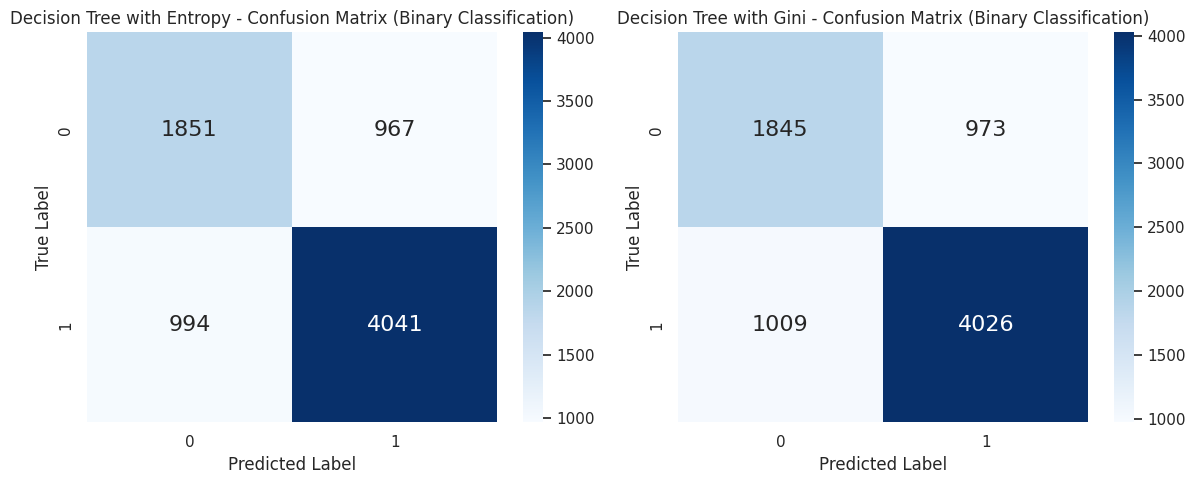

In [75]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_entropy_binary_1, annot=True, fmt='d', cmap="Blues", annot_kws={"size": 16})
plt.title("Decision Tree with Entropy - Confusion Matrix (Binary Classification)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_gini_binary_1, annot=True, fmt='d', cmap="Blues", annot_kws={"size": 16})
plt.title("Decision Tree with Gini - Confusion Matrix (Binary Classification)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

Bag-of-Words with Random Forest

In [76]:
vectorizer_review = CountVectorizer()

X_train_bow_review = vectorizer_review.fit_transform(df_train['processed_reviewText'])
X_val_bow_review = vectorizer_review.transform(df_val['processed_reviewText'])

rf_20_trees_binary = RandomForestClassifier(n_estimators=20, random_state=42)
rf_20_trees_binary.fit(X_train_bow_review, df_train['binary_target'])
y_pred_20_trees_binary_1 = rf_20_trees_binary.predict(X_val_bow_review)
accuracy_20_trees_binary_1 = metrics.accuracy_score(df_val['binary_target'], y_pred_20_trees_binary_1)
conf_matrix_20_trees_binary_1 = metrics.confusion_matrix(df_val['binary_target'], y_pred_20_trees_binary_1)

rf_50_trees_binary = RandomForestClassifier(n_estimators=50, random_state=42)
rf_50_trees_binary.fit(X_train_bow_review, df_train['binary_target'])
y_pred_50_trees_binary_1 = rf_50_trees_binary.predict(X_val_bow_review)
accuracy_50_trees_binary_1 = metrics.accuracy_score(df_val['binary_target'], y_pred_50_trees_binary_1)
conf_matrix_50_trees_binary_1 = metrics.confusion_matrix(df_val['binary_target'], y_pred_50_trees_binary_1)

rf_100_trees_binary = RandomForestClassifier(n_estimators=100, random_state=42)
rf_100_trees_binary.fit(X_train_bow_review, df_train['binary_target'])
y_pred_100_trees_binary_1 = rf_100_trees_binary.predict(X_val_bow_review)
accuracy_100_trees_binary_1 = metrics.accuracy_score(df_val['binary_target'], y_pred_100_trees_binary_1)
conf_matrix_100_trees_binary_1 = metrics.confusion_matrix(df_val['binary_target'], y_pred_100_trees_binary_1)

print("Random Forest Accuracy with 20 Trees (Binary Classification):", accuracy_20_trees_binary_1)
print("Confusion Matrix:")
print(conf_matrix_20_trees_binary_1)

print("Random Forest Accuracy with 50 Trees (Binary Classification):", accuracy_50_trees_binary_1)
print("Confusion Matrix:")
print(conf_matrix_50_trees_binary_1)

print("Random Forest Accuracy with 100 Trees (Binary Classification):", accuracy_100_trees_binary_1)
print("Confusion Matrix:")
print(conf_matrix_100_trees_binary_1)

Random Forest Accuracy with 20 Trees (Binary Classification): 0.796256207818668
Confusion Matrix:
[[1946  872]
 [ 728 4307]]
Random Forest Accuracy with 50 Trees (Binary Classification): 0.8149751687253279
Confusion Matrix:
[[1911  907]
 [ 546 4489]]
Random Forest Accuracy with 100 Trees (Binary Classification): 0.8228702406723545
Confusion Matrix:
[[1893  925]
 [ 466 4569]]


TF-IDF with Random Forest

In [77]:
vectorizer_review = TfidfVectorizer()

X_train_tfidf_review = vectorizer_review.fit_transform(df_train['processed_reviewText'])
X_val_tfidf_review = vectorizer_review.transform(df_val['processed_reviewText'])

df_train['binary_target'] = df_train['overall'].apply(lambda x: 0 if x in [1.0, 2.0] else 1)
df_val['binary_target'] = df_val['overall'].apply(lambda x: 0 if x in [1.0, 2.0] else 1)

X_train_tfidf_combined = hstack([X_train_tfidf_review])
X_val_tfidf_combined = hstack([X_val_tfidf_review])

rf_20_trees_binary = RandomForestClassifier(n_estimators=20, random_state=42)
rf_20_trees_binary.fit(X_train_tfidf_combined, df_train['binary_target'])
y_pred_20_trees_binary_2 = rf_20_trees_binary.predict(X_val_tfidf_combined)
accuracy_20_trees_binary_2 = metrics.accuracy_score(df_val['binary_target'], y_pred_20_trees_binary_2)
conf_matrix_20_trees_binary_2 = metrics.confusion_matrix(df_val['binary_target'], y_pred_20_trees_binary_2)

rf_50_trees_binary = RandomForestClassifier(n_estimators=50, random_state=42)
rf_50_trees_binary.fit(X_train_tfidf_combined, df_train['binary_target'])
y_pred_50_trees_binary_2 = rf_50_trees_binary.predict(X_val_tfidf_combined)
accuracy_50_trees_binary_2 = metrics.accuracy_score(df_val['binary_target'], y_pred_50_trees_binary_2)
conf_matrix_50_trees_binary_2 = metrics.confusion_matrix(df_val['binary_target'], y_pred_50_trees_binary_2)

rf_100_trees_binary = RandomForestClassifier(n_estimators=100, random_state=42)
rf_100_trees_binary.fit(X_train_tfidf_combined, df_train['binary_target'])
y_pred_100_trees_binary_2 = rf_100_trees_binary.predict(X_val_tfidf_combined)
accuracy_100_trees_binary_2 = metrics.accuracy_score(df_val['binary_target'], y_pred_100_trees_binary_2)
conf_matrix_100_trees_binary_2 = metrics.confusion_matrix(df_val['binary_target'], y_pred_100_trees_binary_2)

print("Random Forest Accuracy with 20 Trees (Binary Classification):", accuracy_20_trees_binary_2)
print("Confusion Matrix:")
print(conf_matrix_20_trees_binary_2)

print("Random Forest Accuracy with 50 Trees (Binary Classification):", accuracy_50_trees_binary_2)
print("Confusion Matrix:")
print(conf_matrix_50_trees_binary_2)

print("Random Forest Accuracy with 100 Trees (Binary Classification):", accuracy_100_trees_binary_2)
print("Confusion Matrix:")
print(conf_matrix_100_trees_binary_2)

Random Forest Accuracy with 20 Trees (Binary Classification): 0.8003310836622947
Confusion Matrix:
[[1893  925]
 [ 643 4392]]
Random Forest Accuracy with 50 Trees (Binary Classification): 0.8180313256080479
Confusion Matrix:
[[1864  954]
 [ 475 4560]]
Random Forest Accuracy with 100 Trees (Binary Classification): 0.8249076785941678
Confusion Matrix:
[[1858  960]
 [ 415 4620]]


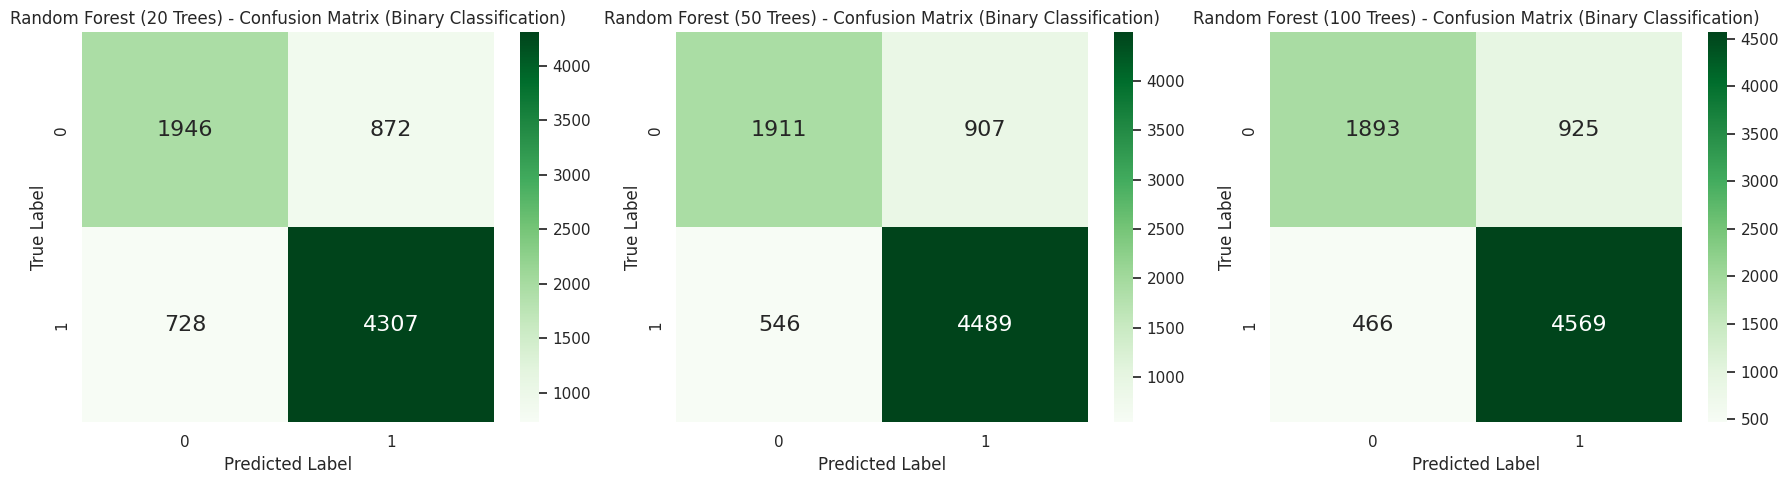

In [78]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_20_trees_binary_1, annot=True, fmt='d', cmap="Greens", annot_kws={"size": 16})
plt.title("Random Forest (20 Trees) - Confusion Matrix (Binary Classification)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_50_trees_binary_1, annot=True, fmt='d', cmap="Greens", annot_kws={"size": 16})
plt.title("Random Forest (50 Trees) - Confusion Matrix (Binary Classification)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_100_trees_binary_1, annot=True, fmt='d', cmap="Greens", annot_kws={"size": 16})
plt.title("Random Forest (100 Trees) - Confusion Matrix (Binary Classification)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

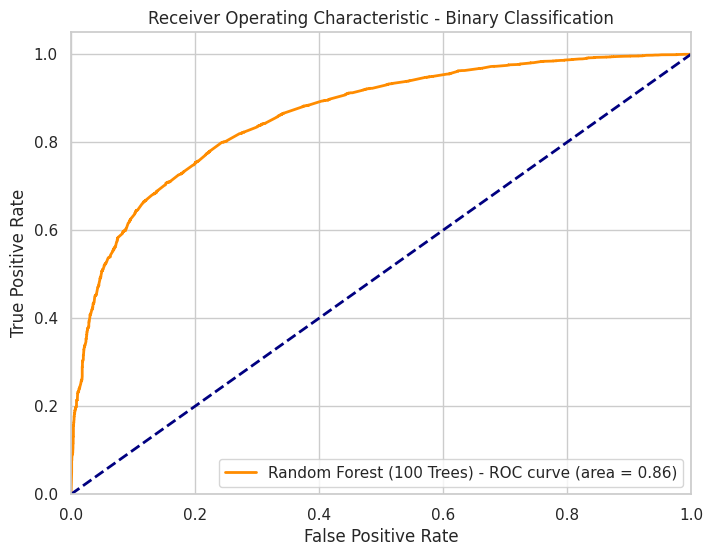

In [79]:
y_score_rf_100_trees = rf_100_trees_binary.predict_proba(X_val_bow_review)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(df_val['binary_target'], y_score_rf_100_trees)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (100 Trees) - ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Binary Classification')
plt.legend(loc="lower right")
plt.show()

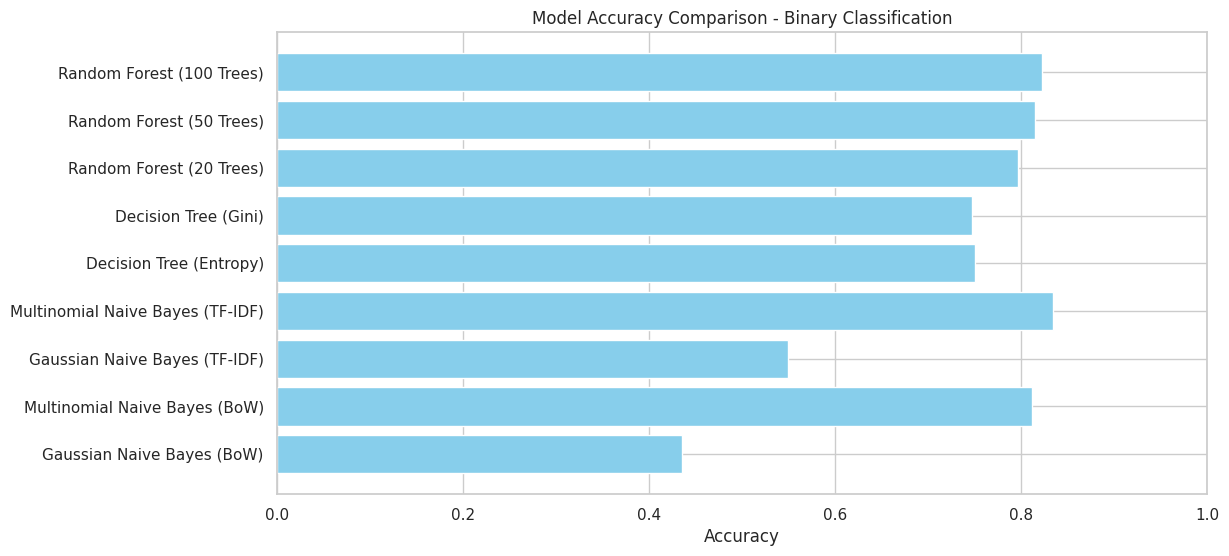

In [80]:
models = ['Gaussian Naive Bayes (BoW)', 'Multinomial Naive Bayes (BoW)',
          'Gaussian Naive Bayes (TF-IDF)', 'Multinomial Naive Bayes (TF-IDF)',
          'Decision Tree (Entropy)', 'Decision Tree (Gini)',
          'Random Forest (20 Trees)', 'Random Forest (50 Trees)', 'Random Forest (100 Trees)']

accuracies = [accuracy_gaussian_binary_1, accuracy_multinomial_binary_1,+
              accuracy_gaussian_binary_2, accuracy_multinomial_binary_2,
              accuracy_entropy_binary_1, accuracy_gini_binary_1,
              accuracy_20_trees_binary_1, accuracy_50_trees_binary_1, accuracy_100_trees_binary_1]

plt.figure(figsize=(12, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison - Binary Classification')
plt.xlim(0, 1.0)
plt.show()